In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [14]:
filename1 = 'points_002.csv'
filename2 = 'points_03.csv'

data1 = pd.read_csv(filename1, delimiter = ',')
data2 = pd.read_csv(filename2, delimiter = ',')

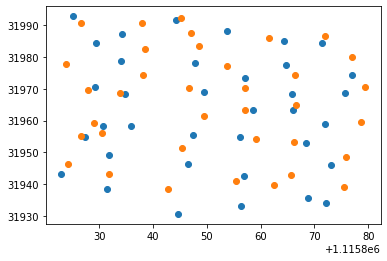

In [190]:
x1 = data1['x'].values
y1 = data1['y'].values
plt.scatter(x1, y1)

x2 = data2['x'].values
y2 = data2['y'].values
plt.scatter(x2, y2)


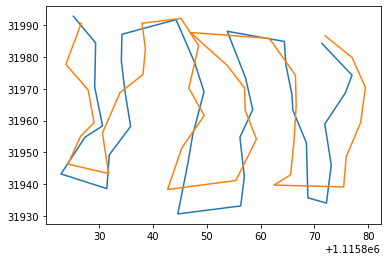

In [189]:
plt.plot(x1, y1)
plt.plot(x2, y2)

In [50]:
#compute vectors
v_mag = []
polar = []
cart = []
for i in range(0, len(data1) - 1):
    a = np.array((data1['x'][i], data1['y'][i]))
    b = np.array((data1['x'][i+1], data1['y'][i+1]))    
    dist = np.linalg.norm(a-b)
    v_mag.append(dist)
    
    b = b - a
    cart.append(b)
    r = np.sqrt(b[0]**2+b[1]**2)
    t = np.arctan2(b[1],b[0])
    polar.append([r, t])
    
    
#v_mag.append(-1)
#data1['v_mag'] = v_mag

#polar,cart

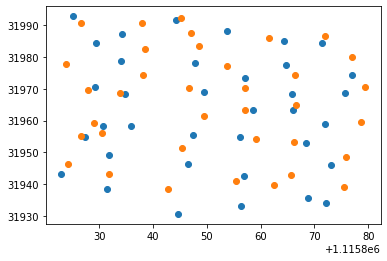

In [70]:
plt.scatter(x1, y1)
plt.scatter(x2, y2)

In [240]:
keys = np.isnan(data1['match']) != True
match = 2
key1 = data1[data1['match'] == match]
key2 = data2[data2['match'] == match]
coord1 = np.array((np.array(key1.x)[0], np.array(key1.y)[0]))
coord2 = np.array((np.array(key2.x)[0], np.array(key2.y)[0]))
translate = (coord2 - coord1) / 2

#translate should be based on new best estimate location, not just base location

coord1, coord2, translate

(array([1115825.18913086,   31992.86675121]),
 array([1115826.6638003 ,   31990.72085293]),
 array([ 0.73733472, -1.07294914]))

In [241]:
start=key1.index.values[0]
end=start + 1 + 1

base = data1.iloc[start:end]

start = key2.index.values[0]
end=start + 1 + 1
match_set = data2.iloc[start:end]

# get the subset of only possible matches that are within a certain radius of the target vector
x2_match = data2['x'].values - translate[0]
y2_match = data2['y'].values - translate[1]


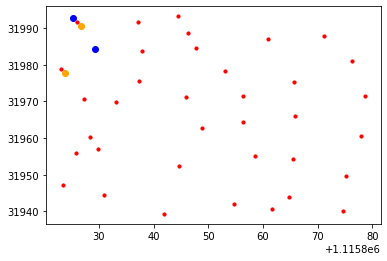

In [242]:
plt.scatter(base['x'].values, base['y'].values, c='blue')
plt.scatter(match_set['x'].values, match_set['y'].values, c='orange')
plt.scatter(x2_match, y2_match, c='red', s=10)



In [149]:
#now just get the closest one to the target vector
base.x[6]
# first check for vector match
# if no vector match then get closest match
#compute all distances
#get the closest
#assign it as a match
#mark the match we were working from as complete

Each iteration resolved all unmatched vectors if possible, using vector match, closest position match, and lastly pigeonhole match. 
Then a new iteration repeats the process.
Unmatched vectors include both incoming and outgoing vectors to existing matches.

1115831.4165156062